In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I noticed the project template applied preprocessing before splitting, which risks data leakage.
To ensure fair evaluation, we first split the dataset into train/test sets, and then applied scaling, PCA, and feature selection only on the training set — applying the same transformations to the test set afterward.

In [38]:
##let's start with seeing the featuare and the data 
## will i use the cleveland data set
import pandas as pd

columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

df = pd.read_csv("../data/processed.cleveland.data", names=columns, na_values='?')

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [39]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [40]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [41]:
df = df[df['ca'].notna()]
df = df[df['thal'].notna()]
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [42]:
## this categorical data needs to be converted to numerical data
print(df['cp'].unique())       
print(df['thal'].unique())
print(df['restecg'].unique())
print(df['slope'].unique())

[1. 4. 3. 2.]
[6. 3. 7.]
[2. 0. 1.]
[3. 2. 1.]


In [43]:
## we will do hot encoding 
## don't need all columns as first column is redunent
df=pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True, dtype=int)
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,0,0,0,1,0,1,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2,0,0,1,0,1,1,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,0,0,1,0,1,1,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,1,0,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,1,0,0,0,1,0,0,0,0


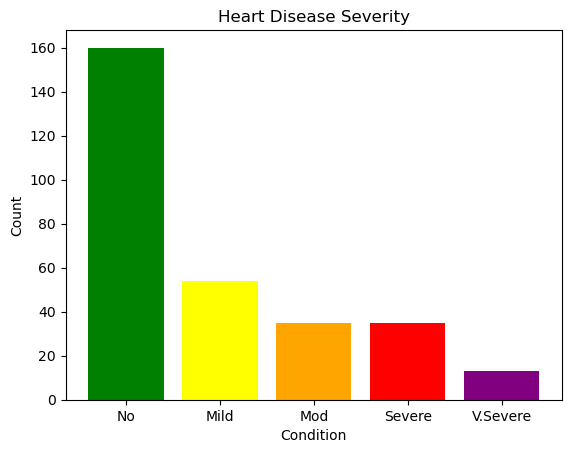

In [44]:
counts = df['target'].value_counts().sort_index()

counts = df['target'].value_counts().sort_index()

colors = ['green', 'yellow', 'orange', 'red', 'purple']  # one color per level

plt.bar(counts.index, counts.values, color=colors)
plt.xticks(
    ticks=[0, 1, 2, 3, 4],
    labels=['No', 'Mild', 'Mod', 'Severe', 'V.Severe']
)
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Heart Disease Severity')
plt.show()

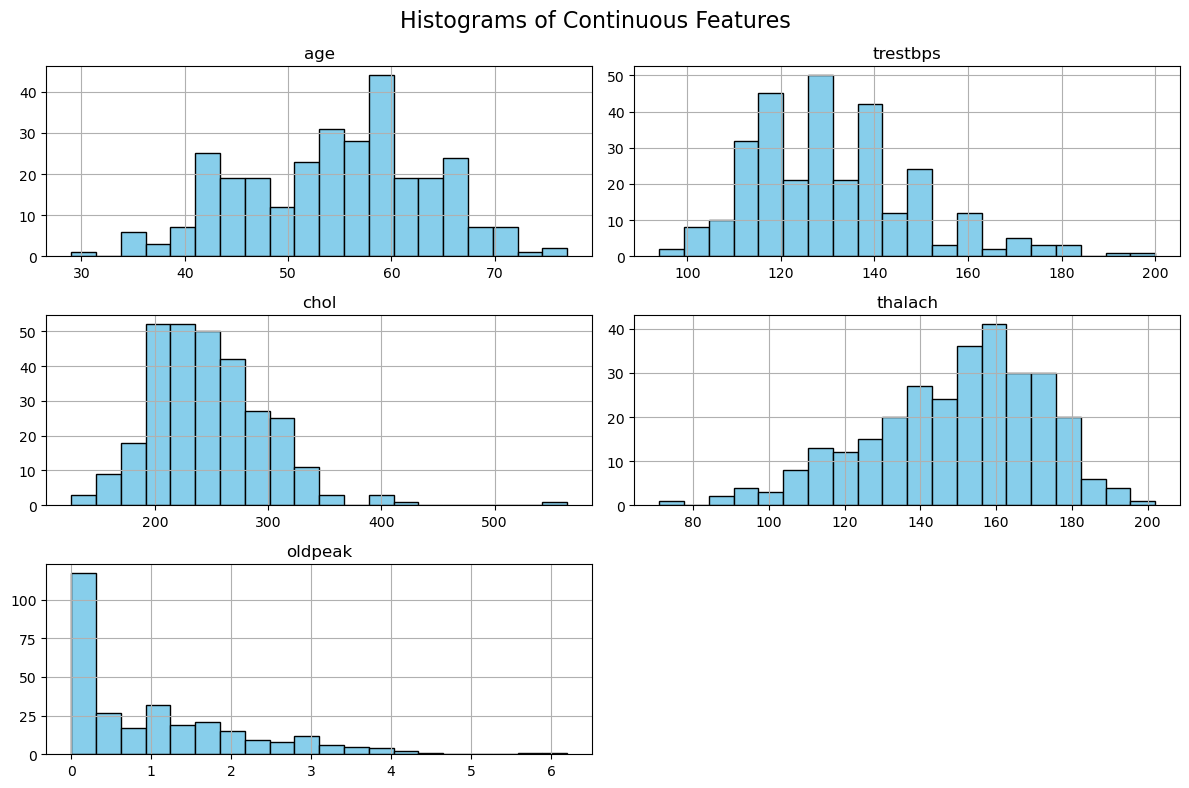

In [45]:
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[continuous_cols].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Continuous Features', fontsize=16)
plt.tight_layout()
plt.show()

In [46]:
## we need to fix skewed data here
import numpy as np
from sklearn.model_selection import train_test_split


X = df.drop('target', axis=1)
y = df['target']

# i will split here to avoid data lackage later

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42  
)

test_data = X_test.copy()
test_data['target'] = y_test.values
test_data['target'] = test_data['target'].apply(lambda x: 1 if x > 0 else 0)

test_data['chol']=np.log1p(test_data['chol'])
test_data['oldpeak']=np.sqrt(test_data['oldpeak'])

df_original = df.copy()

df = pd.concat([X_train, y_train], axis=1)

df['chol'] = np.log1p(df['chol'])
df['oldpeak'] = np.sqrt(df['oldpeak'])

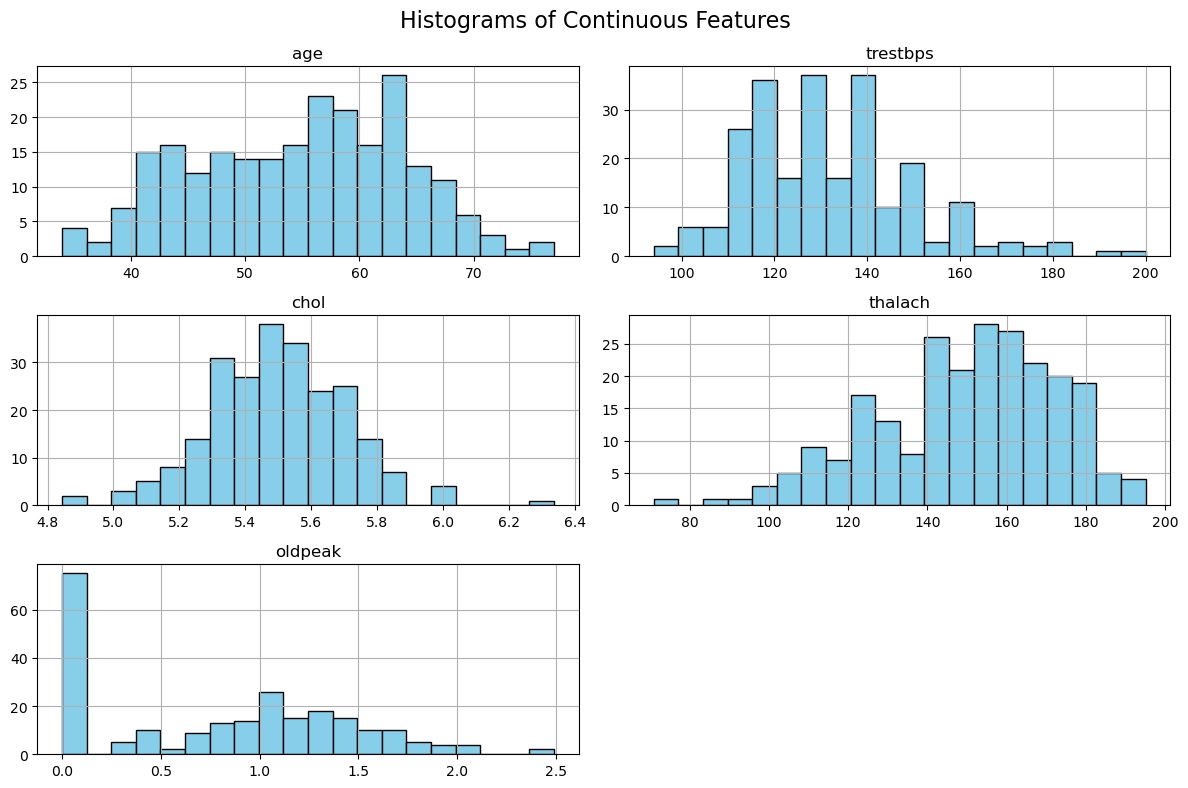

In [47]:
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[continuous_cols].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Continuous Features', fontsize=16)
plt.tight_layout()
plt.show()

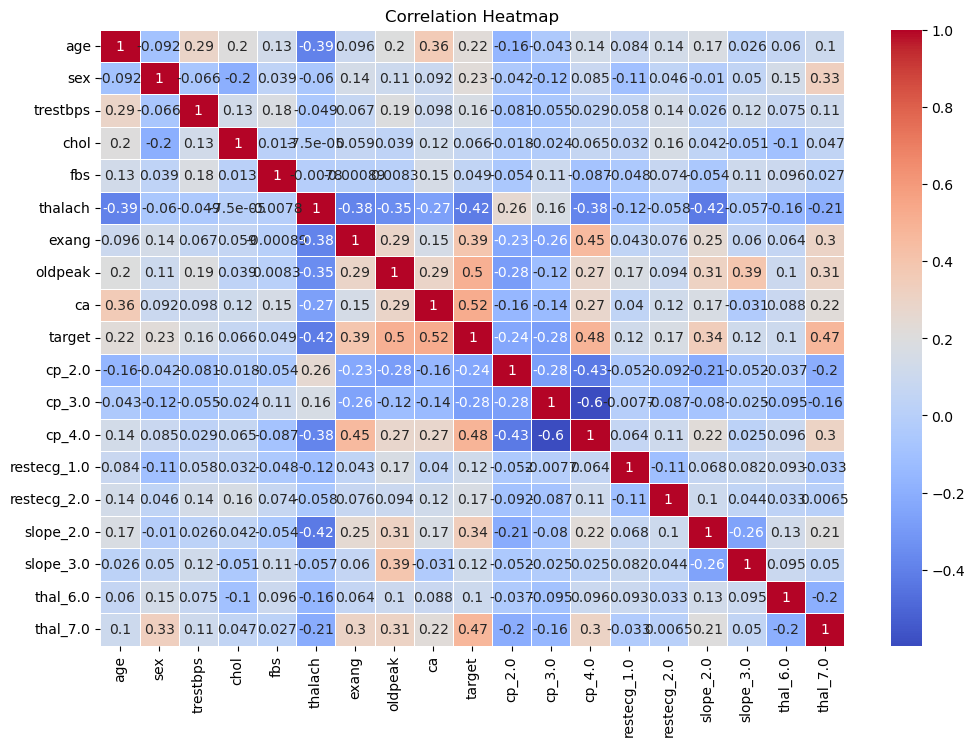

In [48]:
## just for exploration data analysis not building the model to not leak data 
plt.figure(figsize=(12, 8))
sns.heatmap(df_original.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

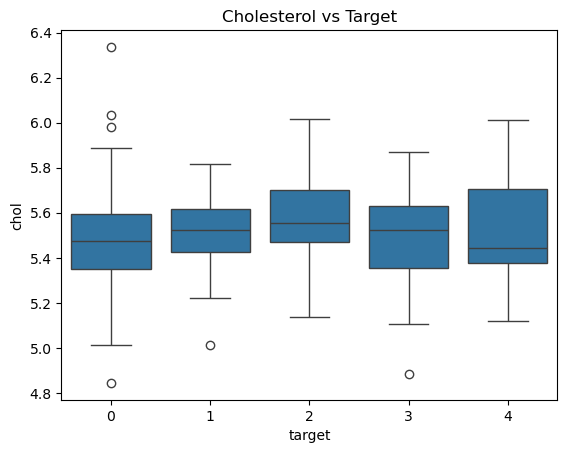

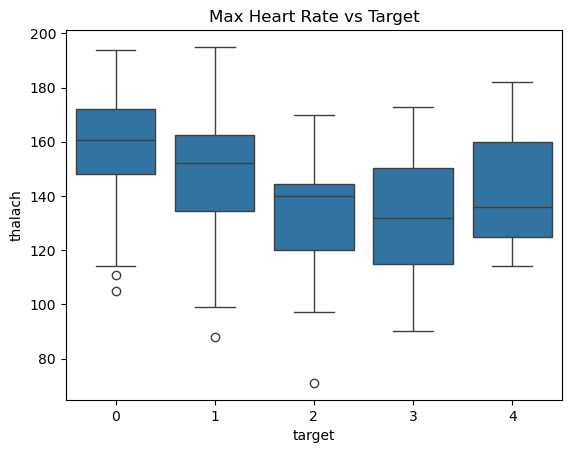

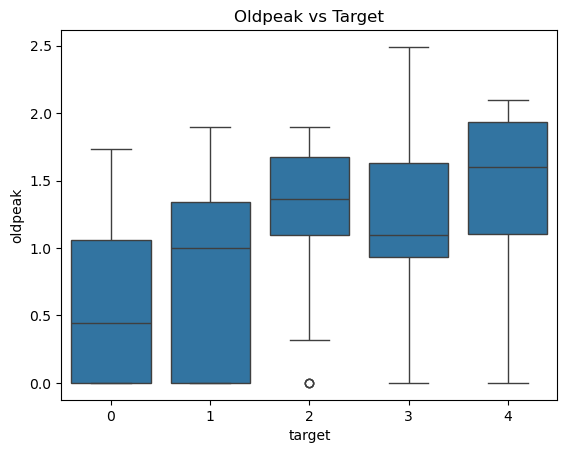

In [49]:
sns.boxplot(x='target', y='chol', data=df)
plt.title("Cholesterol vs Target")
plt.show()

sns.boxplot(x='target', y='thalach', data=df)
plt.title("Max Heart Rate vs Target")
plt.show()

sns.boxplot(x='target', y='oldpeak', data=df)
plt.title("Oldpeak vs Target")
plt.show()

In [50]:
## removing outliers
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df


df = remove_outliers_iqr(df, ['chol', 'trestbps', 'thalach', 'oldpeak'])

In [51]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak','ca']

# Fit on training data only
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Apply same scaling to test data
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

In [52]:
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
test_data.to_csv("../data/Test_cleaned_heart_data.csv", index=False)
df.to_csv("../data/Trained_cleaned_heart_data.csv", index=False)

In [53]:
print(df.head())
test_data.head()

          age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  \
301  0.534884  0.0  0.473684  0.472424  0.0  0.811321    0.0  0.000000   
82   0.116279  1.0  0.605263  0.788966  0.0  0.886792    0.0  0.000000   
178  0.209302  1.0  0.473684  0.769539  0.0  0.698113    0.0  0.553581   
249  0.651163  1.0  0.447368  0.342576  1.0  0.490566    0.0  0.000000   
148  0.255814  1.0  0.447368  0.746404  0.0  0.773585    0.0  0.000000   

           ca  cp_2.0  cp_3.0  cp_4.0  restecg_1.0  restecg_2.0  slope_2.0  \
301  0.333333       1       0       0            0            1          1   
82   0.000000       0       1       0            0            1          0   
178  0.333333       0       1       0            0            0          0   
249  0.000000       1       0       0            0            1          0   
148  0.000000       1       0       0            0            1          0   

     slope_3.0  thal_6.0  thal_7.0  target  
301          0         0         0       

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0,target
221,0.465116,0.0,0.184211,0.599382,0.0,0.745283,0.0,0.000000,0.0,0,1,0,0,1,0,0,0,0,0
244,0.604651,0.0,0.342105,0.182546,1.0,0.075472,0.0,0.000000,0.0,0,1,0,0,0,0,0,0,0,0
200,0.372093,0.0,0.210526,0.548028,0.0,0.669811,0.0,0.000000,0.0,0,0,1,0,1,0,0,0,0,0
291,0.488372,0.0,0.500000,0.854216,0.0,0.735849,0.0,0.439941,0.0,1,0,0,0,0,0,0,0,0,0
238,0.348837,0.0,0.526316,0.614683,0.0,0.698113,0.0,0.000000,0.0,1,0,0,0,0,1,0,0,0,0
